## Microbial mutagenicity AMES competition

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('D:/ML_Pyton_course/ML_Python/project/datasets/ames_datapreprocessing_knime.csv')
df.head()

,Unnamed: 0,AmesResult,Structure,SlogP,SMR,LabuteASA,TPSA,AMW,ExactMW,NumLipinskiHBA,...,MQN33,MQN34,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41,MQN42
0,0,C,[Na+].[Na+].CC1(C)SC2C(NC(=O)C(C([O-])=O)C3=CS...,-8.11340,85.0967,207.568628,129.67,428.399,428.008867,8,...,0,1,2,0,0,0,0,0,2,1
1,1,C,FC(F)(F)C1=CC(N\N=C2/C(=O)C(=CC3=CC=CC=C23)C(=...,11.17980,225.8008,365.430948,141.12,930.476,928.036083,10,...,0,0,0,7,0,0,0,0,4,2
2,2,C,CNC(=O)\C=C(/C)OP(=O)(OC)OC,1.05370,50.5332,82.840931,73.86,223.165,223.060959,6,...,0,0,0,0,0,0,0,0,0,0
3,3,C,CC(C)NC(=O)N1CC(=O)N(C1=O)C1=CC(Cl)=CC(Cl)=C1,2.88000,79.7177,131.140795,69.72,330.171,329.033397,6,...,0,0,1,1,0,0,0,0,0,0
4,4,C,C\C(CC\C=C(\C)C1CC(=O)C(C)(C)O1)=C/CC1=C(O)C(C...,5.22402,113.9341,176.578705,83.83,420.933,420.170352,5,...,0,0,1,1,0,0,0,0,0,0


## data preprocessing

In [3]:
df.shape

(12138, 122)

In [4]:
df.isnull().sum()

Unnamed: 0                     0
AmesResult                     6
Structure                      0
SlogP                          0
SMR                            0
LabuteASA                      0
TPSA                           0
AMW                            0
ExactMW                        0
NumLipinskiHBA                 0
NumLipinskiHBD                 0
NumRotatableBonds              0
NumHBD                         0
NumHBA                         0
NumAmideBonds                  0
NumHeteroAtoms                 0
NumHeavyAtoms                  0
NumAtoms                       0
NumStereocenters               0
NumUnspecifiedStereocenters    0
NumRings                       0
NumAromaticRings               0
NumSaturatedRings              0
NumAliphaticRings              0
NumAromaticHeterocycles        0
NumSaturatedHeterocycles       0
NumAliphaticHeterocycles       0
NumAromaticCarbocycles         0
NumSaturatedCarbocycles        0
NumAliphaticCarbocycles        0
          

In [5]:
df.AmesResult.unique()

array(['C', 'A', 'B', nan], dtype=object)

In [6]:

df_original = df
df = df_original.dropna()
print(df_original.shape[0] - df.shape[0])
df.isna().sum()

6


Unnamed: 0                     0
AmesResult                     0
Structure                      0
SlogP                          0
SMR                            0
LabuteASA                      0
TPSA                           0
AMW                            0
ExactMW                        0
NumLipinskiHBA                 0
NumLipinskiHBD                 0
NumRotatableBonds              0
NumHBD                         0
NumHBA                         0
NumAmideBonds                  0
NumHeteroAtoms                 0
NumHeavyAtoms                  0
NumAtoms                       0
NumStereocenters               0
NumUnspecifiedStereocenters    0
NumRings                       0
NumAromaticRings               0
NumSaturatedRings              0
NumAliphaticRings              0
NumAromaticHeterocycles        0
NumSaturatedHeterocycles       0
NumAliphaticHeterocycles       0
NumAromaticCarbocycles         0
NumSaturatedCarbocycles        0
NumAliphaticCarbocycles        0
          

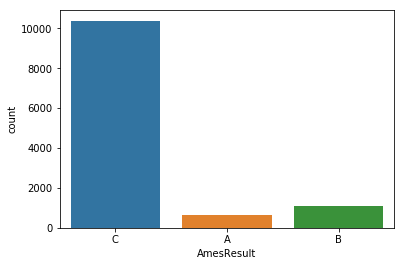

In [53]:
sns.countplot('AmesResult', data=df)

In [16]:
X = df.iloc[0: , 3:]
y = df.AmesResult

In [9]:
#p=0.8
#tr = p*(1-p)
#sel = VarianceThreshold(threshold=0)
#sel.fit(X)
#mask_retain = sel.get_support() ## samo kazwa koi shte sotanat i koi ne no ne gi e iztril
#print(mask_retain)

#ind_retain = sel.get_support(indices = True)
#print(len(ind_retain))

#sel.transform(X)
#X.shape


## clasification model without feature selection

#### KNN model

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, random_state=4,test_size = 0.25)

In [18]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [27]:
y_pred = knn.predict(X_test)
(y_pred != y_test).sum()

432

In [28]:
print(df.shape)

(12132, 122)


In [31]:
print(432/12132*100)

3.5608308605341246


In [29]:
knn.score(X_test,y_test)

0.857566765578635

### Multinomial Naive Bayes

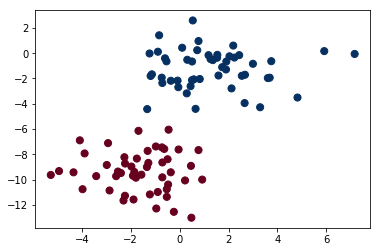

In [35]:
# Generate isotropic Gaussian blobs for clustering
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu'); # как да го приложа за конкретния случай

In [40]:
model = GaussianNB()
model.fit(X, y); 

In [52]:
accuracy_score(y_test,y_pred)

0.857566765578635

### logistic regression

In [58]:
lg = LogisticRegression()
fitted = lg.fit(X_train,y_train)
# коректно ли е да прилагам логистична регресия за 3 класа, имам усещането, че не е, но как да разделя на по два класа. 
# Представям си го да обединя А+Б(силно токлични + токсични) като един клас(токсични) и С (нетоксични) втори клас. 
# След което да приложа логистична регресия на класовете А и Б.
# Как да ги обединя после двата модела?

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [59]:
res = y_pred == y_test
true_count = res[res==True]

print(f'Correct answers: {true_count.count()} out of {y_pred.size}')

Correct answers: 2601 out of 3033


In [60]:
print(2601/3033*100)

85.7566765578635


In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           A       0.40      0.03      0.06       177
           B       0.50      0.07      0.13       264
           C       0.86      0.99      0.92      2592

   micro avg       0.86      0.86      0.86      3033
   macro avg       0.59      0.37      0.37      3033
weighted avg       0.81      0.86      0.80      3033



### decision tree

In [55]:
model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
## пробвах дърво на решенията не го разбирам особено, но да пробвам

# feature selection

### corr feature selection

In [62]:
corr_matrix = X.corr()
#print(corr_matrix)
#for column in corr_matrix.columns:
    #col_data = corr_matrix[column]
    #print(column)
    
    #for value in col_data:
        #if abs(value) >0.8:
           # print(value)

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

## remove feature with low variance

In [44]:
## from sklearn.feature_selection import SelectKBest

In [45]:
from sklearn.feature_selection import VarianceThreshold

In [46]:
X.shape

(12132, 119)

In [50]:
#print(X.var())
treshold = 0.9
sel = VarianceThreshold(threshold=treshold).fit(X)
mask = sel.get_support()
retained_columns = X.columns[mask]    
print(retained_columns)
sel.transform(X)
X.shape

Index(['SlogP', 'SMR', 'LabuteASA', 'TPSA', 'AMW', 'ExactMW', 'NumLipinskiHBA',
       'NumLipinskiHBD', 'NumRotatableBonds', 'NumHBD', 'NumHBA',
       'NumHeteroAtoms', 'NumHeavyAtoms', 'NumAtoms', 'NumStereocenters',
       'NumUnspecifiedStereocenters', 'NumRings', 'NumAromaticRings',
       'NumAliphaticRings', 'NumAromaticCarbocycles', 'Chi0v', 'Chi1v',
       'Chi2v', 'Chi3v', 'Chi4v', 'Chi1n', 'Chi2n', 'Chi3n', 'Chi4n',
       'HallKierAlpha', 'kappa1', 'kappa2', 'kappa3', 'slogp_VSA1',
       'slogp_VSA2', 'slogp_VSA3', 'slogp_VSA4', 'slogp_VSA5', 'slogp_VSA6',
       'slogp_VSA7', 'slogp_VSA8', 'slogp_VSA10', 'slogp_VSA11', 'slogp_VSA12',
       'smr_VSA1', 'smr_VSA2', 'smr_VSA3', 'smr_VSA4', 'smr_VSA5', 'smr_VSA6',
       'smr_VSA7', 'smr_VSA9', 'smr_VSA10', 'peoe_VSA1', 'peoe_VSA2',
       'peoe_VSA3', 'peoe_VSA4', 'peoe_VSA5', 'peoe_VSA6', 'peoe_VSA7',
       'peoe_VSA8', 'peoe_VSA9', 'peoe_VSA10', 'peoe_VSA11', 'peoe_VSA12',
       'peoe_VSA13', 'peoe_VSA14', 'MQN1', 'MQN

(12132, 119)

In [ ]:
X = X.drop(axis=1,columns= )

In [22]:
# from sklearn.feature_selection import SelectKBest, f_classif
# sel = SelectKBest(f_classif, k=40).fit(X, y)

# mask_retain = sel.get_support() ## samo kazwa koi shte sotanat i koi ne no ne gi e iztril
# #print(mask_retein)

# ind_retain = sel.get_support(indices = True)
# print(ind_retain)

# X_new = sel.transform(X)
# X_new.shape

In [62]:
X_new.shape

(12132, 40)

In [63]:
from sklearn.model_selection import train_test_split


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=42, test_size=0.25)

In [65]:
from sklearn.naive_bayes import GaussianNB

In [66]:
nb = GaussianNB().fit(X_train,y_train)

In [50]:
y_pred=nb.predict(X_test)


In [67]:
from sklearn.metrics import accuracy_score

In [68]:
accuracy_score(y_test,y_pred)

0.3620178041543027

In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
confusion_matrix(y_test, y_pred)

array([[ 136,    5,   16],
       [ 221,   14,   54],
       [1491,  148,  948]], dtype=int64)